# Estimation of π using the Monte Carlo Method

**Author:** Yassine Berrhazi  
**Objective:** Estimate π using a random simulation and visualize its convergence.


## Principle

We consider a square of side 2 centered at (0,0) and a unit circle inscribed in this square.  
The probability that a random point lies inside the circle is:

$$ P = \frac{\text{Area of the circle}}{\text{Area of the square}} = \frac{\pi r^2}{(2r)^2} = \frac{\pi}{4} $$

And:

$$ \pi \approx 4 \times \frac{N_{\text{circle}}}{N_{\text{total}}} $$



## Implementation

We now move to experimentation:
- Generate random points uniformly in the square \([-1,1]^2\),
- Count how many fall inside the unit circle,
- Estimate π with $$ \pi \approx 4 \times \frac{N_\text{circle}}{N} .$$

We will use the `random` module to generate random numbers between 0 and 1,  
and `matplotlib` to visualize the points.

In [1]:
from random import random
import matplotlib.pyplot as plt


We start by defining a simple function `is_in_circle()` that returns `1`  
if the point is inside the unit circle, and `0` otherwise.

In [2]:
def is_in_circle():
    a = random()            # to generate a random number between 0 and 1 
    b = random()
    x = -1 + 2 * a          # x-coordinate of a random point M
    y = -1 + 2 * b          # y-coordinate of a random point M
    
    d = (x**2 + y**2)**(1/2)   # the position vector OM
    if d <= 1:     
        return 1
    else:    
        return 0

We simulate successively with different number of iterations to find the most precise value of π

In [3]:
for l in [1000, 10000, 100000, 1000000]:
    N = 0
    for i in range(l):
        N += is_in_circle()
    pi_estimation = 4 * N / l
    print("With {} iterations, π ≈ {}".format(l, pi_estimation))


With 1000 iterations, π ≈ 3.108
With 10000 iterations, π ≈ 3.1224
With 100000 iterations, π ≈ 3.13808
With 1000000 iterations, π ≈ 3.144468


## Law of Large Numbers

If $X_1, X_2, \dots, X_N$ are independent random variables with finite expectation $\mathbb{E}[X]$, then:

$$
\frac{1}{N}\sum_{i=1}^{N} X_i \xrightarrow[N\to\infty]{} \mathbb{E}[X]
$$

In our case:
- $X_i = 1$ if the point is inside the circle, $0$ otherwise
- $\mathbb{E}[X_i] = \frac{\pi}{4}$

Hence:
$$
\bar{X}_N = \frac{1}{N}\sum_{i=1}^{N} X_i \xrightarrow[N\to\infty]{} \frac{\pi}{4}
\quad \text{and} \quad 
4\bar{X}_N \to \pi
$$


## Visualization of the Convergence

We now visualize how the Monte Carlo estimation of π converges as the number of points increases.
At each iteration, we compute the current estimate of π and store it to plot its evolution.


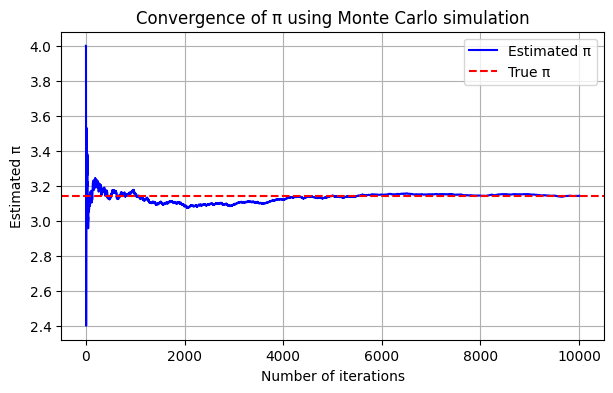

In [4]:
N = 10000
inside = 0
pi_values = []

for k in range(1, N + 1):
    inside += is_in_circle()      # we use the previous function 
    pi_values.append(4 * inside / k)

plt.figure(figsize=(7,4))
plt.plot(range(1, N + 1), pi_values, label="Estimated π", color='blue')
plt.axhline(3.1415926535, color='red', linestyle='--', label="True π")
plt.xlabel("Number of iterations")
plt.ylabel("Estimated π")
plt.title("Convergence of π using Monte Carlo simulation")
plt.legend()
plt.grid(True)
plt.show()


### Conclusion

We observe that as the number of random samples increases,  
the estimated value of π converges towards its true value, illustrating  
the Law of Large Numbers in action.
